# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Dataset yang digunakan dari Kaggle: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

# Load dataset
path_train = 'DatasetAirlinePassengerSatisfaction_raw/train.csv'
path_test = 'DatasetAirlinePassengerSatisfaction_raw/test.csv'
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

# Menggabungkan train dan test
df = [df_train, df_test]
df = pd.concat(df)
df = df.drop(columns=['Unnamed: 0'])
df = df.reset_index(drop=True)

df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Menampilkan struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [4]:
# Menampilkan statistik deskriptif
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


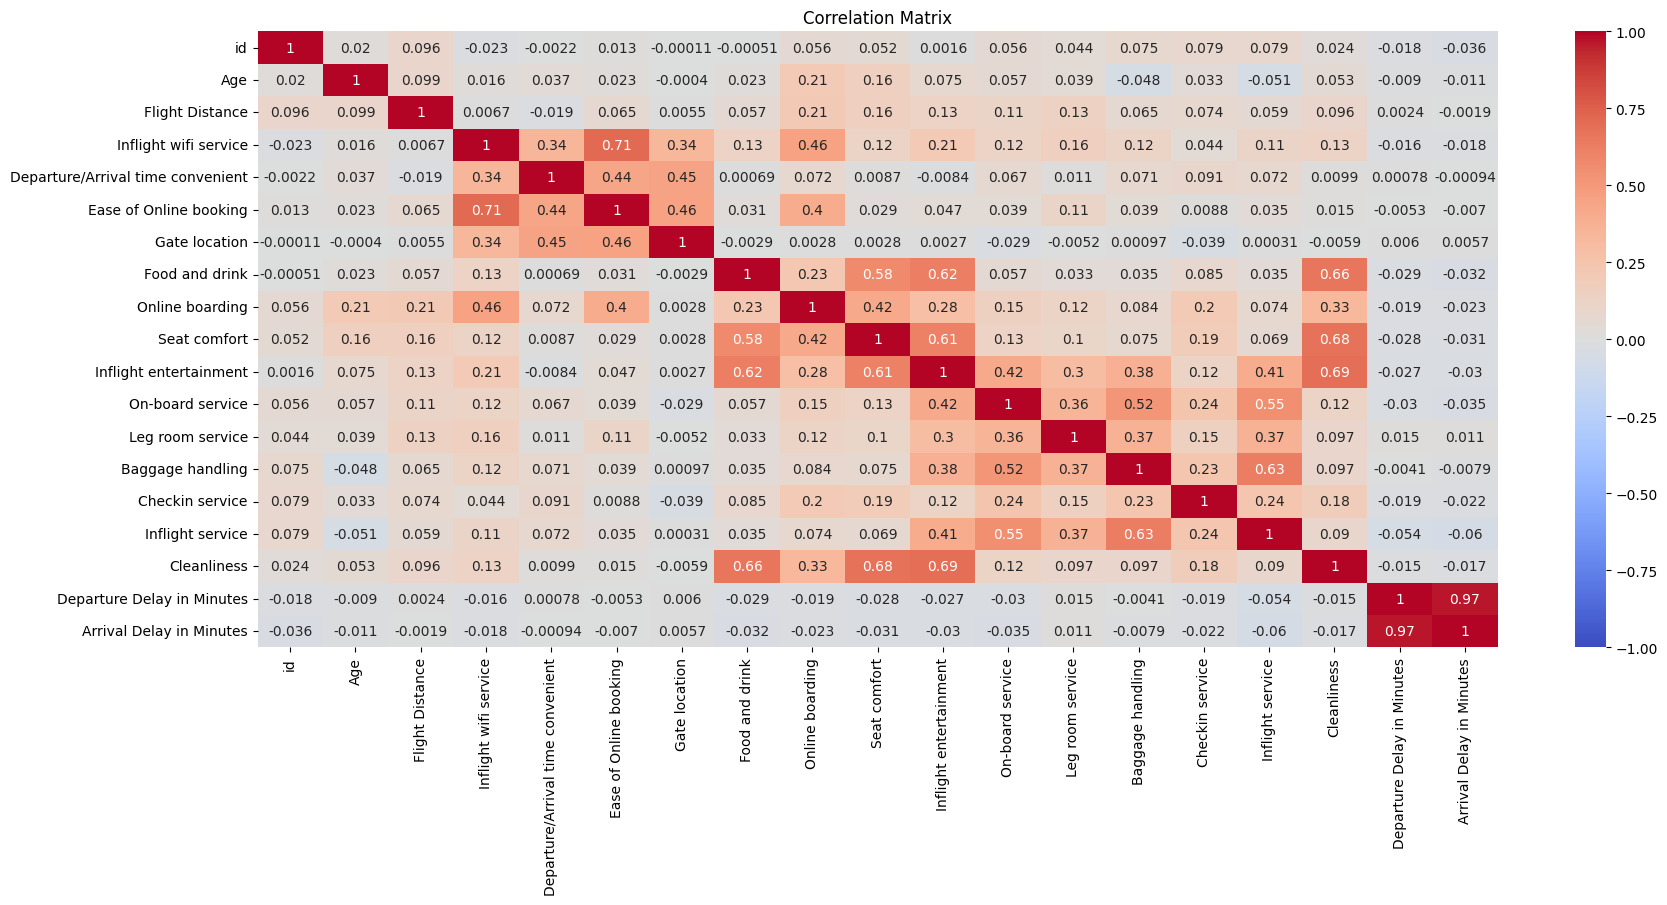

In [5]:
# Menampilkan korelasi antar fitur
plt.figure(figsize=(20,8))

numeric_corr = df.select_dtypes(include=['number'])
correlation_matrix = numeric_corr.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

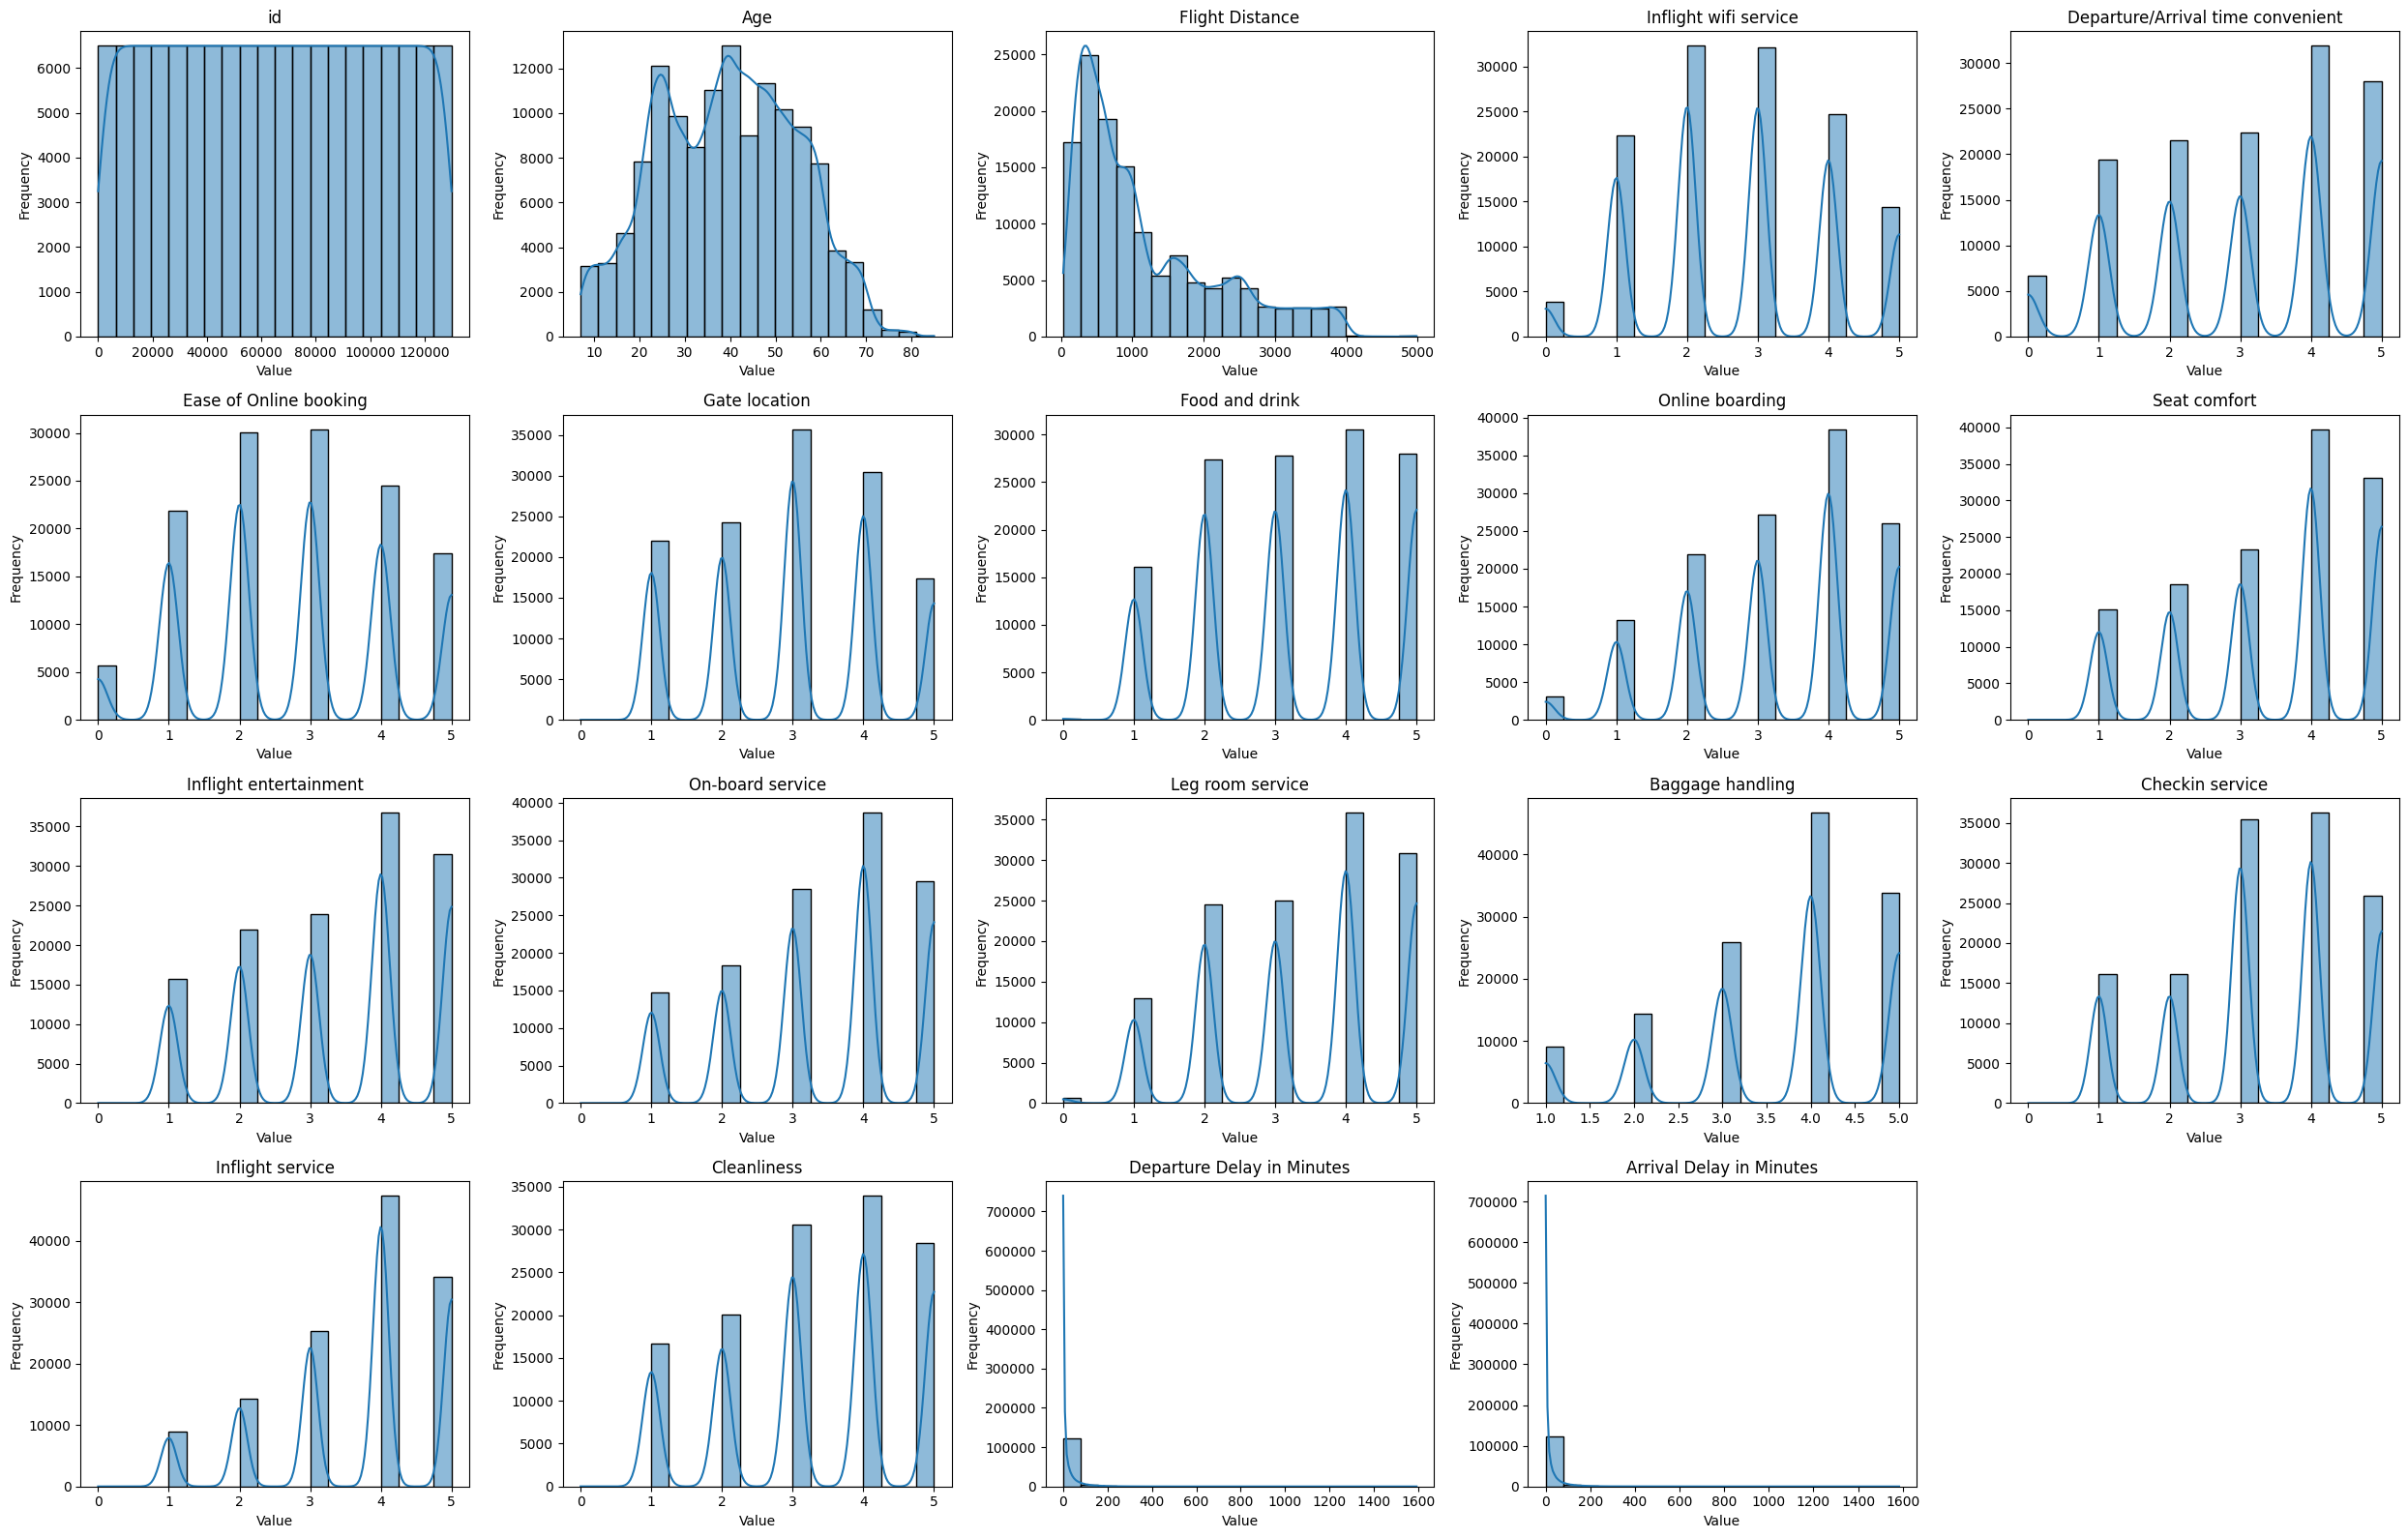

In [6]:
# Menampilkan histogram untuk semua kolom numerik
n_vars = numeric_corr.shape[1]
n_cols = 5
n_rows = -(-n_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(numeric_corr.columns):
    sns.histplot(
        data=numeric_corr,
        x=column,
        ax=axes[i],
        bins=20,
        kde=True
    )
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

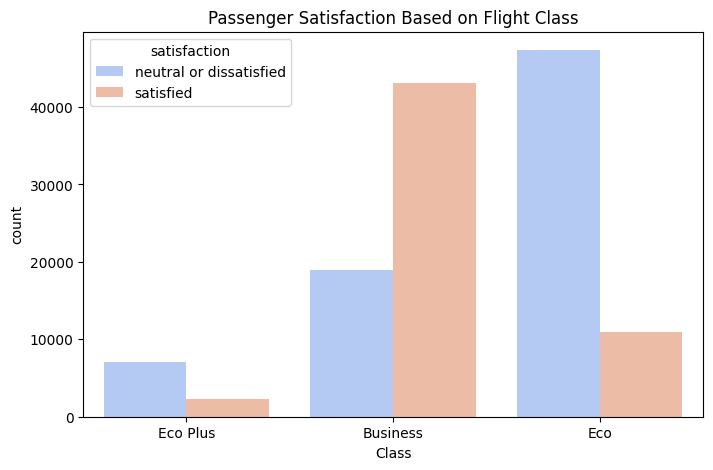

In [7]:
# Menampilkan barchart kolom kategorikal
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', hue='satisfaction', data=df, palette='coolwarm')
plt.title('Passenger Satisfaction Based on Flight Class')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# Cek data yang hilang
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
Arrival Delay in Minutes,393


In [9]:
# Menghapus kolom yang tidak diperlukan seperti ID dan Arrival Delay (menghindari missing value dan multikolinearitas dengan Departure Delay)
df = df.drop(columns=['id', 'Arrival Delay in Minutes'])

In [10]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

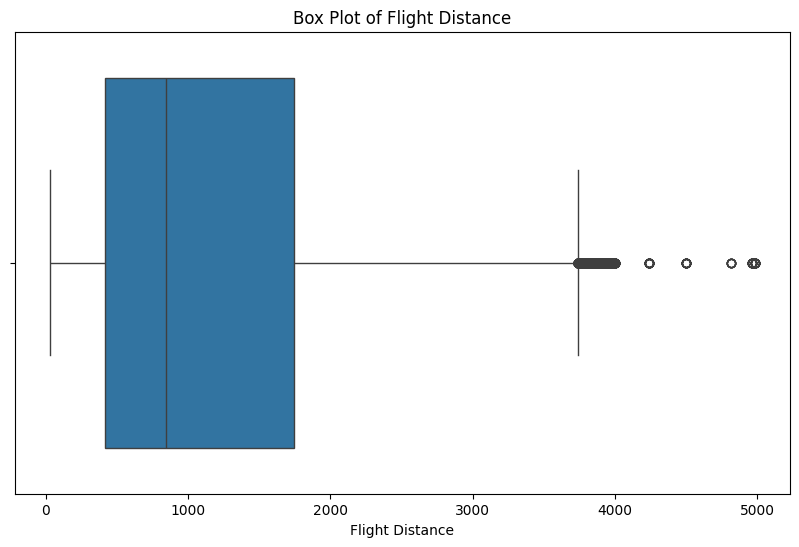

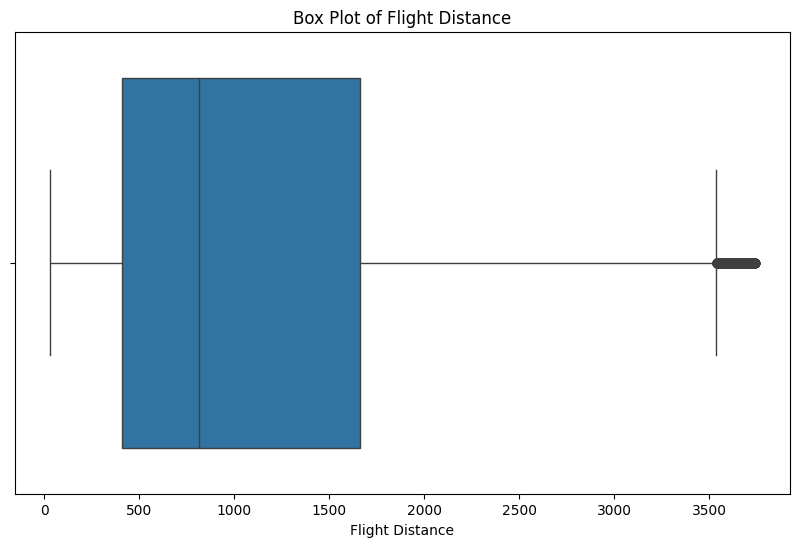

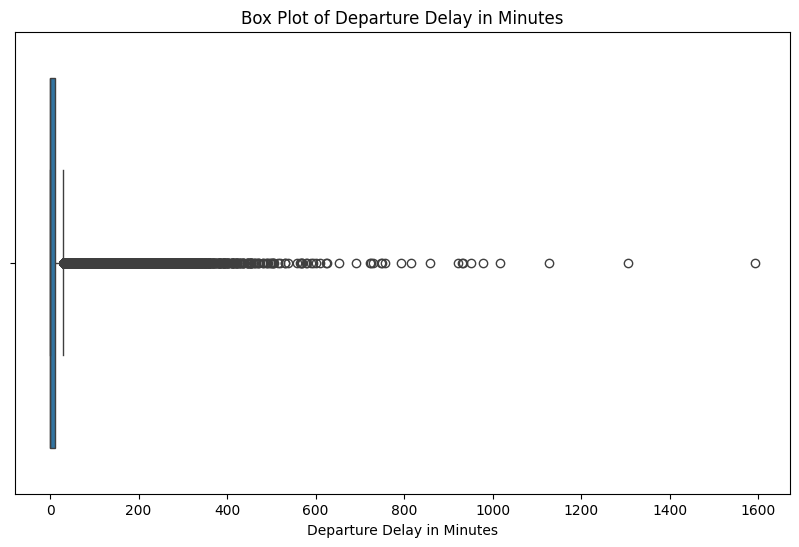

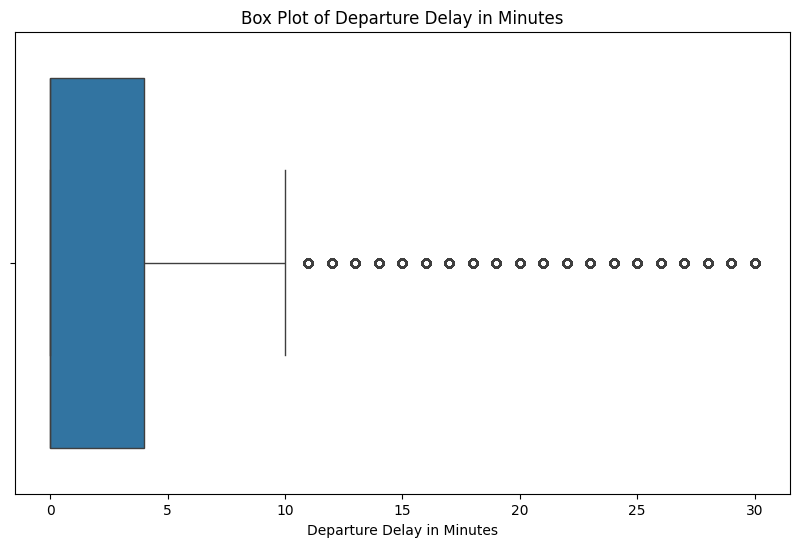

In [11]:
# Melakukan Handling Outlier Data menggunakan metode IQR.

# Handling outlier untuk kolom Flight Distance.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Flight Distance'])
plt.title(f'Box Plot of Flight Distance')
plt.show()

Q1 = df['Flight Distance'].quantile(0.25)
Q3 = df['Flight Distance'].quantile(0.75)
IQR = Q3 - Q1

condition = ~((df['Flight Distance'] < (Q1 - 1.5 * IQR)) | (df['Flight Distance'] > (Q3 + 1.5 * IQR)))

df = df[condition]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Flight Distance'])
plt.title(f'Box Plot of Flight Distance')
plt.show()

# Handling outlier untuk kolom Departure Delay in Minutes.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Departure Delay in Minutes'])
plt.title(f'Box Plot of Departure Delay in Minutes')
plt.show()

Q1 = df['Departure Delay in Minutes'].quantile(0.25)
Q3 = df['Departure Delay in Minutes'].quantile(0.75)
IQR = Q3 - Q1

condition = ~((df['Departure Delay in Minutes'] < (Q1 - 1.5 * IQR)) | (df['Departure Delay in Minutes'] > (Q3 + 1.5 * IQR)))

df = df[condition]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Departure Delay in Minutes'])
plt.title(f'Box Plot of Departure Delay in Minutes')
plt.show()

In [12]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik.
bin = [0, 14, 24, 64, 100]
label = ['Child', 'Youth', 'Adult', 'Senior']

df['Age_Group'] = pd.cut(df['Age'], bins=bin, labels=label)

df = df.drop(columns=['Age'])

In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
encoders = {}

categorical = df.select_dtypes(include=['object', 'category']).columns

for col in categorical:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df.head()

,Gender,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Age_Group
0,1,0,1,2,460,3,4,3,1,5,...,5,4,3,4,4,5,5,25,0,1
1,1,1,0,0,235,3,2,3,3,1,...,1,1,5,3,1,4,1,1,0,0
2,0,0,0,0,1142,2,2,2,2,5,...,5,4,3,4,4,4,5,0,1,0
3,0,0,0,0,562,2,5,5,5,2,...,2,2,5,3,1,4,2,11,0,0
4,1,0,0,0,214,3,3,3,3,4,...,3,3,4,4,3,3,3,0,1,0


In [14]:
# Melakukan feature scaling pada kolom numerik.
numeric = df.select_dtypes(include=['number']).columns
numeric = numeric.drop('satisfaction')

scaler = StandardScaler()
df[numeric] = scaler.fit_transform(df[numeric])

df.head()

,Gender,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Age_Group
0,1.015530,-0.478308,1.468549,2.250229,-0.728848,0.195602,0.613252,0.173068,-1.545157,1.342606,...,1.225459,0.472705,-0.260119,0.308627,0.541594,1.142440,1.300368,3.017731,0,0.396314
1,1.015530,2.090703,-0.680944,-0.970350,-0.972402,0.195602,-0.692888,0.173068,0.020598,-1.666929,...,-1.769099,-1.860499,1.254539,-0.536193,-1.832633,0.290816,-1.743948,-0.385349,0,-0.521444
2,-0.984708,-0.478308,-0.680944,-0.970350,0.009389,-0.553229,-0.692888,-0.539705,-0.762280,1.342606,...,1.225459,0.472705,-0.260119,0.308627,0.541594,0.290816,1.300368,-0.527144,1,-0.521444
3,-0.984708,-0.478308,-0.680944,-0.970350,-0.618437,-0.553229,1.266323,1.598616,1.586353,-0.914545,...,-1.020459,-1.082765,1.254539,-0.536193,-1.832633,0.290816,-0.982869,1.032601,0,-0.521444
4,1.015530,-0.478308,-0.680944,-0.970350,-0.995133,0.195602,-0.039818,0.173068,0.020598,0.590222,...,-0.271820,-0.305030,0.497210,0.308627,-0.249815,-0.560807,-0.221790,-0.527144,1,-0.521444


In [15]:
# Split train dan test
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

# 80/20 train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Train:", X_train.shape[0])
print("Data Test:", X_test.shape[0])

Data Train: 87479
Data Test: 21870
